In [157]:
import scipy.linalg

len('ИльяГребенкин') % 2 +1

2

VI.2. (15) Используя стандартный генератор случайных чисел с равномерным распределением на интервале $[0,1)$, сгенерируите выборку из нормального распределения, $p(x) \sim \exp \left(-x^{2} / 2\right)$, на интервале $-\infty<$ $x<\infty$. Используйте метод Бокса-Мюллера: рассмотрите произведение двух независимых нормально распределенных величин и перейдите в полярные координаты. Постройте гистограмму (или эмпирическую функцию распределения), сравните с ожидаемым нормальным распределением. Проверьте гипотезу о нормальном распределении сгенерированных данных. Критерий и уровень значимости выберите самостоятельно, выбор обоснуйте.

In [158]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

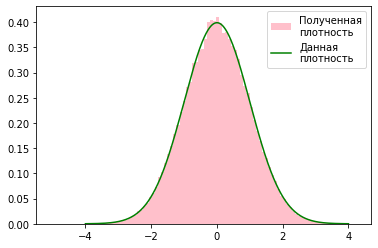

In [159]:
n = 100000
X = np.linspace(-4, 4, n)
pdf = np.exp(-X**2/2)
vals = np.random.uniform(0, 1, n)
more_vals = np.random.uniform(0, 1, n)
r = np.sqrt(-2*np.log(vals))
phi = 2 * np.pi * more_vals
x = r * np.cos(phi)
plt.hist(x, bins=100, density=True, color='pink', label='Полученная\nплотность')
plt.plot(X, pdf/np.sqrt(2*np.pi), color='green' , label='Данная\nплотность')
plt.legend()
plt.show()



VI.3. (30) Вычислите следующий интеграл по $n$-мерному вектору $\vec{x}$ (в бесконечных пределах) методом Монте-Kapлo:
$$
\int \Pi_{i=1}^{n} d x_{i} \frac{\exp \left(-\vec{x}^{T} A \vec{x}\right)}{1+x_{1}^{2}+\ldots+x_{n}^{2}},
$$
где матрица $A$ содержится в А4. (в файле data_89.npz)

In [160]:
array = np.load('data_89.npz')
A = array['A4']
print(A.shape)
n = A.shape[0]
l = scipy.linalg.eigvals(A).real # эти значения действительные
print(l)

(8, 8)
[32.   16.    8.    4.    2.    0.25  0.5   1.  ]


Далее:
coef $= \sqrt{\pi/\lambda_i}$ -- коэффициент для преобразования экспоненты к стандартному виду плотности
vector -- набор $x_i$
frac -- результирующая дробь для каждой реализации

In [161]:
I = 0
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    for i in range(N):
        coef = np.sqrt(np.pi/l)
        gamma = np.random.uniform(0, 1, n)
        vector = - 1/l * np.log(gamma) #используя метод обратных ф-ий генерим х
        frac = 1/(1 + np.sum(vector)) #опущены последовательные операции взятия квадратного корня и возведения в квадрат
        frac *= np.prod(coef)
        I += frac
    I /= N
    print('I = ',I, 'N = ', N)

I =  0.15428122245827605 N =  10
I =  0.21664673210504326 N =  100
I =  0.2162833475185298 N =  1000
I =  0.21598343134694542 N =  10000
I =  0.21585788957710608 N =  100000
I =  0.21555162935548733 N =  1000000
I =  0.2154651819691258 N =  10000000


VII.1. (20) Рассмотрите функцию, отображающую вектор $\vec{x}$ длины $n$ в скаляр:
$$
f(\vec{x} \mid a)=\frac{1}{\exp \left(a_{0}+x_{1} a_{1}+\ldots+x_{n} a_{n}\right)+1},
$$
параметризованную коэффицентами $a_{0}, a_{1}, \ldots, a_{n} .$ В строках матрицы А2 (в файле data_89.npz) содержится набор $m$ векторов $\vec{x}_{1}, \ldots, \vec{x}_{m}$, а в векторе у2 - набор $m$ чисел $y_{1}, \ldots, y_{m}$. Найдите коэффициенты $a$ такие, что
$$
\sum_{i}\left(f\left(\vec{x}_{i} \mid a\right)-y_{i}\right)^{2}
$$
минимально. Используйте библиотечные функции пакета scipy.optimize : minimize или least_squares. Указание: При правильном использовании синтаксиса NumPу, вычисление целевой функции окажется коротким и читабельным.


In [162]:
A2 = array['A2']
y2 = array['y2']
m = A2.shape[0]

In [163]:
from scipy.optimize import minimize

In [164]:
def f(x, a):
    return 1/(np.exp(a[0] + np.sum(x * a[1:])) + 1)

In [165]:
def goal_f(a):
    sum = 0
    for i in range(m):
        sum += (f(A2[i], a) - y2[i])**2
    return sum

In [166]:
res = minimize(goal_f, np.zeros(A2.shape[1]+1))
print('Ответ =', res.x)

Ответ = [ 0.58423832  0.32177813 -0.1136294   1.99874006 -0.31966352 -0.28386703
 -0.35973178 -0.02175148  0.0097682   1.53323474 -0.59548242]


In [167]:
goal_f(res.x)

0.04355277572294319

VII.2. (20) Решите предыдущую задачу, используя метод градиентного спуска с фиксированным $\gamma$, в качестве начального приближения выбирая случайный вектор $\vec{d}$. Вычислите градиент двумя способами: разностным приближением и используя пакет autograd.

Разностное приближение

In [168]:
def my_grad_d(f):
    eps = 10e-8
    der = np.zeros(A2.shape[1]+1)
    for i in range(A2.shape[1]+1):
        d[i] = d[i] + eps
        fdp = f(d)
        d[i] = d[i] - 2 * eps
        fdm = f(d)
        d[i] = d[i] + eps
        der[i] = (fdp - fdm) / eps
    return der

In [180]:
gamma_ = 0.2
steps = 1000
d = np.random.uniform(0, 1, A2.shape[1]+1)
for i in range(steps):
    gradient = my_grad_d(goal_f)
    d = d - gamma_ * gradient # изменение аргумента на текущей итерации
    # print(np.linalg.norm(gradient))
print(d, '\n')
print(goal_f(d), '\n')

[ 0.56069781  0.31657032 -0.10374402  1.99396473 -0.30366604 -0.28589418
 -0.34982005 -0.03566263  0.01887279  1.5376604  -0.59633577] 

0.04355508317711683 



Autograd

In [179]:
import autograd.numpy as np
from autograd import grad
D_goal_f = grad(goal_f) #исп. пакет autograd

d = np.random.uniform(0, 1, A2.shape[1]+1)
for i in range(steps):
    gradient = D_goal_f(d)
    d = d - gamma_ * gradient # изменение аргумента на текущей итерации
print(d, '\n')
print(goal_f(d), '\n')

[ 0.55324179  0.31491052 -0.10062787  1.99247386 -0.29858379 -0.28653737
 -0.34671033 -0.0400736   0.02174168  1.53906003 -0.59660925] 

0.04355679595181769 

[ 0.4466442   0.29080993 -0.05661675  1.97262034 -0.22523788 -0.29580579
 -0.30362707 -0.10325783  0.06213262  1.55939151 -0.60079782] 

0.043636390600464744 

